# Projet Intelligence Artificielle

*Professeur Younes Zerolis* 

## Integrants: 

 *Alejandro Gonzalez*
 
 *Carlos Cavalcante*
 
 *Salim last_name*
 
 *Stephane last_name*


Adress for dataset

https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/


Schéma
Pour la description étendue de la signification des champs, nous vous recommandons de consulter la notice officielle.

https://www.data.gouv.fr/fr/datasets/5cc1b94a634f4165e96436c1/
	


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import neighbors, preprocessing
data_2019 = pd.read_csv('full 2.csv',   encoding='utf8')
pd.set_option('display.max_columns', None)
data_2019.head(10)

/Users/carloscavalcante/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2019-1,2019-01-04,1,Vente,37220.0,26.0,NaN,RUE DE MONTHOLON,2730,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AI0298,NaN,NaN,8,19.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,20.0,1.0,NaN,NaN,NaN,NaN,NaN,5.209562,46.198840
1,2019-2,2019-01-04,1,Vente,185100.0,22.0,NaN,RUE GEN DELESTRAINT,1650,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AM0095,NaN,NaN,137,NaN,154,61.51,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,62.0,3.0,NaN,NaN,NaN,NaN,NaN,5.219396,46.198766
2,2019-2,2019-01-04,1,Vente,185100.0,22.0,B,RUE GEN DELESTRAINT,1650,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AM0095,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.219396,46.198766
3,2019-3,2019-01-08,1,Vente,209000.0,3.0,NaN,RUE DES CHAMPAGNES,0043,1160.0,1314,Priay,1,NaN,NaN,013140000E1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,90.0,4.0,S,sols,NaN,NaN,940.0,5.282104,45.999566
4,2019-4,2019-01-07,1,Vente,134900.0,5.0,NaN,LOT LE BIOLAY,A003,1370.0,1350,Saint-Étienne-du-Bois,1,NaN,NaN,01350000AA0011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,101.0,5.0,S,sols,NaN,NaN,490.0,5.299929,46.293278
5,2019-5,2019-01-03,1,Vente,192000.0,165.0,NaN,ALL DES LIBELLULES,0445,1340.0,1024,Attignat,1,NaN,NaN,01024000AI0094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,88.0,4.0,S,sols,NaN,NaN,708.0,5.174803,46.269978
6,2019-6,2019-01-08,1,Vente,45000.0,9.0,NaN,RTE DU VIADUC,0001,1250.0,1106,Cize,1,NaN,NaN,011060000A0086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,39.0,2.0,S,sols,NaN,NaN,631.0,5.452079,46.205294
7,2019-6,2019-01-08,1,Vente,45000.0,NaN,NaN,SUR LA LATIE,B017,1250.0,1106,Cize,1,NaN,NaN,011060000A0975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,L,landes,NaN,NaN,120.0,5.452073,46.205356
8,2019-7,2019-01-04,1,Vente,65000.0,50.0,NaN,RUE DOC NODET,1240,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AL0003,NaN,NaN,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.220604,46.193389
9,2019-7,2019-01-04,1,Vente,65000.0,50.0,NaN,RUE DOC NODET,1240,1000.0,1053,Bourg-en-Bresse,1,NaN,NaN,01053000AL0003,NaN,NaN,17,NaN,33,67.78,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,69.0,3.0,NaN,NaN,NaN,NaN,NaN,5.220604,46.193389


In [8]:
data_2019.shape

(2535791, 40)

In [9]:
data_2019.describe()


,numero_disposition,valeur_fonciere,adresse_numero,code_postal,ancien_code_commune,lot1_surface_carrez,lot2_surface_carrez,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,2.535791e+06,2.506530e+06,1.510153e+06,2.507468e+06,4156.000000,221065.000000,54274.000000,5214.000000,9236.000000,1415.000000,4427.000000,609.000000,2.535791e+06,1.353332e+06,1.035415e+06,1.351615e+06,1.742774e+06,2.483256e+06,2.483256e+06
mean,1.199535e+00,9.715970e+05,7.270275e+02,5.197637e+04,52764.775987,60.976915,63.399269,73.177908,113.200195,86.964148,113.961373,94.380181,3.943330e-01,1.989685e+00,1.145561e+02,2.430351e+00,3.092637e+03,1.805240e+00,4.673679e+01
std,7.401537e+00,7.856914e+06,2.076794e+03,2.730261e+04,25811.932250,91.917658,58.867045,90.466541,523.073715,146.235137,452.971562,113.256244,8.086631e-01,9.438622e-01,9.956993e+02,2.083948e+00,1.364363e+04,4.802475e+00,3.896750e+00
min,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+03,1059.000000,0.140000,0.130000,0.850000,2.000000,1.000000,2.000000,0.890000,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-6.314287e+01,-2.138505e+01
25%,1.000000e+00,6.000000e+04,8.000000e+00,3.123000e+04,35269.000000,33.700000,42.750000,38.105000,7.000000,30.510000,8.000000,23.790000,0.000000e+00,1.000000e+00,5.000000e+01,0.000000e+00,2.330000e+02,-8.134000e-03,4.508209e+01
50%,1.000000e+00,1.490000e+05,2.400000e+01,5.020000e+04,50524.000000,52.900000,60.600000,60.600000,24.000000,61.900000,27.000000,65.000000,0.000000e+00,2.000000e+00,7.500000e+01,3.000000e+00,6.100000e+02,2.229344e+00,4.733312e+01
75%,1.000000e+00,2.690000e+05,8.700000e+01,7.714400e+04,79035.000000,72.670000,76.040000,85.187500,68.000000,100.275000,73.000000,116.100000,1.000000e+00,3.000000e+00,1.050000e+02,4.000000e+00,1.885000e+03,3.530454e+00,4.880124e+01
max,6.940000e+02,2.086000e+09,9.999000e+03,9.749000e+04,91182.000000,9646.200000,8630.000000,3583.640000,17014.000000,3208.900000,11046.000000,1029.550000,1.750000e+02,4.000000e+00,3.129620e+05,6.700000e+01,1.662560e+06,5.582754e+01,5.108207e+01


In [10]:
# X = imputer.transform(data)
data_2019.dtypes

id_mutation                      object
date_mutation                    object
numero_disposition                int64
nature_mutation                  object
valeur_fonciere                 float64
adresse_numero                  float64
adresse_suffixe                  object
adresse_nom_voie                 object
adresse_code_voie                object
code_postal                     float64
code_commune                     object
nom_commune                      object
code_departement                 object
ancien_code_commune             float64
ancien_nom_commune               object
id_parcelle                      object
ancien_id_parcelle               object
numero_volume                    object
lot1_numero                      object
lot1_surface_carrez             float64
lot2_numero                      object
lot2_surface_carrez             float64
lot3_numero                      object
lot3_surface_carrez             float64
lot4_numero                     float64


In [11]:
data_2019.isnull().sum()

id_mutation                           0
date_mutation                         0
numero_disposition                    0
nature_mutation                       0
valeur_fonciere                   29261
adresse_numero                  1025638
adresse_suffixe                 2426362
adresse_nom_voie                  28354
adresse_code_voie                 28189
code_postal                       28323
code_commune                          0
nom_commune                           0
code_departement                      0
ancien_code_commune             2531635
ancien_nom_commune              2531635
id_parcelle                           0
ancien_id_parcelle              2534881
numero_volume                   2529165
lot1_numero                     1753172
lot1_surface_carrez             2314726
lot2_numero                     2372713
lot2_surface_carrez             2481517
lot3_numero                     2509709
lot3_surface_carrez             2530577
lot4_numero                     2526555


In [12]:
# removing columns from ancien_id_parcelle till nombre_lots
columns_removed=data_2019.iloc[:, 16:37]

In [13]:
data_2019=data_2019.drop(columns_removed, axis=1)

In [14]:
data_2019.dtypes

id_mutation             object
date_mutation           object
numero_disposition       int64
nature_mutation         object
valeur_fonciere        float64
adresse_numero         float64
adresse_suffixe         object
adresse_nom_voie        object
adresse_code_voie       object
code_postal            float64
code_commune            object
nom_commune             object
code_departement        object
ancien_code_commune    float64
ancien_nom_commune      object
id_parcelle             object
surface_terrain        float64
longitude              float64
latitude               float64
dtype: object

In [15]:
data_2019_explore=data_2019.drop(["id_mutation","date_mutation","numero_disposition","adresse_numero",
                          "adresse_suffixe","adresse_nom_voie","adresse_code_voie","code_departement","code_commune", 
                          "ancien_code_commune","ancien_nom_commune", "id_parcelle"], axis=1)

In [16]:
data_2019_explore.shape

(2535791, 7)

In [17]:
data_2019_explore.keys()

Index(['nature_mutation', 'valeur_fonciere', 'code_postal', 'nom_commune',
       'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [19]:
data_2019_explore.dtypes

nature_mutation     object
valeur_fonciere    float64
code_postal        float64
nom_commune         object
surface_terrain    float64
longitude          float64
latitude           float64
dtype: object

In [20]:
# Re-order columns
data_2019_explore = data_2019_explore[["nature_mutation","code_postal","nom_commune"
                                       ,"surface_terrain","longitude","latitude","valeur_fonciere"]]

In [21]:
data_2019_explore.head()

,nature_mutation,code_postal,nom_commune,surface_terrain,longitude,latitude,valeur_fonciere
0,Vente,1000.0,Bourg-en-Bresse,NaN,5.209562,46.198840,37220.0
1,Vente,1000.0,Bourg-en-Bresse,NaN,5.219396,46.198766,185100.0
2,Vente,1000.0,Bourg-en-Bresse,NaN,5.219396,46.198766,185100.0
3,Vente,1160.0,Priay,940.0,5.282104,45.999566,209000.0
4,Vente,1370.0,Saint-Étienne-du-Bois,490.0,5.299929,46.293278,134900.0


In [22]:
#Correlation Matrix
corr = data_2019_explore.corr()
corr

,code_postal,surface_terrain,longitude,latitude,valeur_fonciere
code_postal,1.000000,0.015455,-0.046528,0.160585,0.046263
surface_terrain,0.015455,1.000000,-0.010530,0.003855,0.064349
longitude,-0.046528,-0.010530,1.000000,0.073268,0.001943
latitude,0.160585,0.003855,0.073268,1.000000,0.017752
valeur_fonciere,0.046263,0.064349,0.001943,0.017752,1.000000


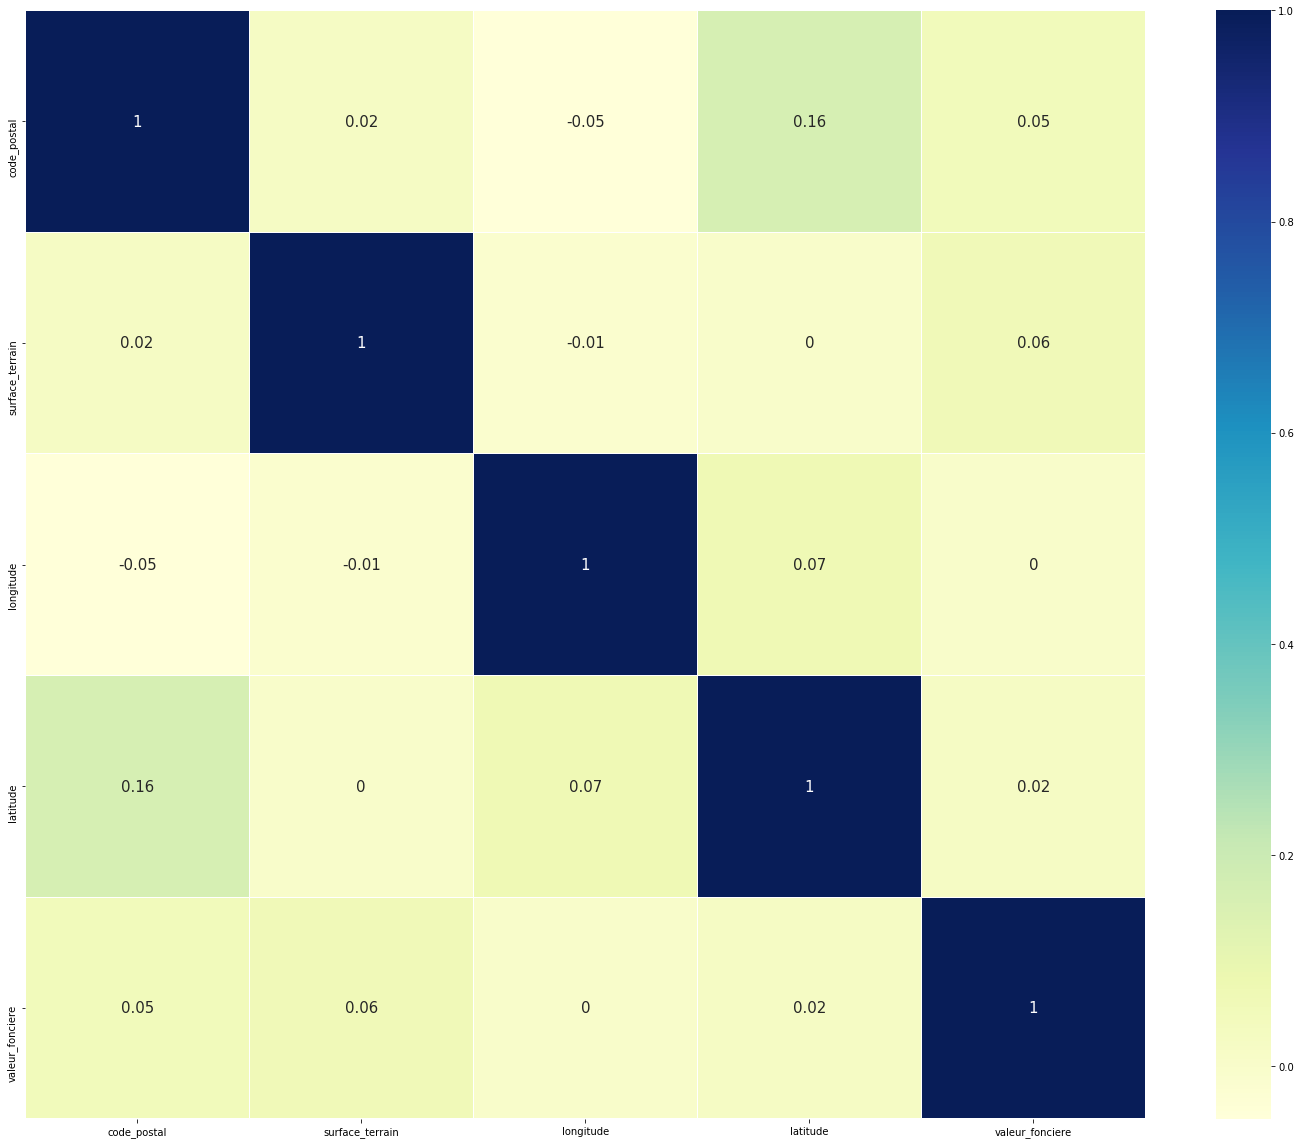

Text(0.5, 0.98, 'Maison France Attributes Correlation Heatmap')

In [23]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig, (ax) = plt.subplots(1, 1, figsize=(20,16))

# On utilise la matrice de correlation pour trouver les correlations entre toutes
sns.heatmap(data=data_2019_explore.corr().round(2), cmap='YlGnBu', annot=True, 
            annot_kws={"size":15},linewidths= .05)
# sns.heatmap(data=data1.corr().round(2))
plt.tight_layout()
plt.show()

fig.suptitle('Maison France Attributes Correlation Heatmap')

# Fetures selection

In [52]:
from sklearn.preprocessing import LabelEncoder
data_tranformed = data_2019_explore.apply(LabelEncoder().fit_transform)

In [53]:
data_tranformed.head()

,nature_mutation,code_postal,nom_commune,surface_terrain,longitude,latitude,valeur_fonciere
0,3,0,3281,303870,1236119,538166,24896
1,3,0,3281,480685,1236730,538147,58713
2,3,0,3281,480686,1236730,538147,58713
3,3,8,19677,939,1240114,502504,63170
4,3,28,24086,489,1241008,552562,47721


In [54]:
X = data_tranformed.iloc[:, :-1]
y = data_tranformed.iloc[:, 6:7]
print(X.shape)
print(y.shape)

(2535791, 6)
(2535791, 1)


## Target = Valeur Fonciere

In [55]:
y.head()

,valeur_fonciere
0,24896
1,58713
2,58713
3,63170
4,47721


## Features = nature_mutation,code_postal,nom_commune,surface_terrain, longitude, latitude

In [56]:
X.head()

,nature_mutation,code_postal,nom_commune,surface_terrain,longitude,latitude
0,3,0,3281,303870,1236119,538166
1,3,0,3281,480685,1236730,538147
2,3,0,3281,480686,1236730,538147
3,3,8,19677,939,1240114,502504
4,3,28,24086,489,1241008,552562


# Training and Testing (80% - 20%), Seed = 44

In [57]:
from numpy import nan
from sklearn.impute import SimpleImputer

In [58]:
imp = SimpleImputer(strategy = 'mean')
X = imp.fit_transform(X)
X

array([[3.000000e+00, 0.000000e+00, 3.281000e+03, 3.038700e+05,
        1.236119e+06, 5.381660e+05],
       [3.000000e+00, 0.000000e+00, 3.281000e+03, 4.806850e+05,
        1.236730e+06, 5.381470e+05],
       [3.000000e+00, 0.000000e+00, 3.281000e+03, 4.806860e+05,
        1.236730e+06, 5.381470e+05],
       ...,
       [0.000000e+00, 4.440000e+03, 1.859500e+04, 5.181900e+04,
        8.148960e+05, 1.103725e+06],
       [3.000000e+00, 4.438000e+03, 1.859300e+04, 7.263900e+05,
        8.085470e+05, 1.109903e+06],
       [3.000000e+00, 4.438000e+03, 1.859300e+04, 8.343470e+05,
        8.085470e+05, 1.109903e+06]])

In [59]:
data_tranformed.isnull().sum()

nature_mutation    0
code_postal        0
nom_commune        0
surface_terrain    0
longitude          0
latitude           0
valeur_fonciere    0
dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_tranformed.iloc[:, :-1], 
                                                    data_tranformed.iloc[:, 6:7],
                                                    test_size = 0.2, random_state = 44)

In [61]:
# Printing the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2028632, 6) (507159, 6) (2028632, 1) (507159, 1)


In [62]:
# X_train = train.as_matrix().astype(np.float)
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

False
True


# Developping a K value

In [63]:
k = math.sqrt(len(y_train))
k = math.floor(k) - 1
k

1423

### Classification with Euclidean =  Minkowski model

In [64]:
# Classifier metric: Euclidean
clf_eucli = neighbors.KNeighborsClassifier(n_neighbors = 22, p=2, metric='euclidean')
clf_eucli

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [65]:
clf_eucli.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [66]:
# Predict the class in all observations
Z = clf_eucli.predict(X_train)
print(Z.shape)

# Compare all predicted Class with real Class' labels
accuracy = clf_eucli.score(X_train, y_train)
print('Accuracy Model Predicted is: {:.3f}'.format(accuracy))

(2028632,)
Accuracy Model Predicted is: 0.288


# Test

In [67]:
# Predict the class in all observations in X_test
Z = clf_eucli.predict(X_test)
print(Z.shape)
# Compare all predicted Class' labels with actual Class' labels
accuracy = clf_eucli.score(X_test, y_test)
print('Accuracy Model Predicted is: {:.3f}'.format(accuracy))

(507159,)
Accuracy Model Predicted is: 0.208


### Importing Metrics Mesures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [6]:
cm = confusion_matrix(y_test, Z)
print('Confusion Matrix:')
cm

NameError: name 'y_test' is not defined

In [ ]:
acc = accuracy_score(y_test, Z)
acc
print('Accuracy: {:.3f}'.format(acc))

In [ ]:
acc_train = clf_eucli.score(X_train, y_train)
print('Accuracy for Training: {:.3f}'.format(acc_train))

In [ ]:
acc_test = clf_eucli.score(X_test, y_test)
print('Accuracy for Testing: {:.3f}'.format(acc_test))